# *Hallo Freunde!!!*

**Today, we will be predcting Heart Attacks with the help of various diffrent models under some given factors**

Do upvote if you find the the NoteBook helpful.

signs of a heart attack.
* > Chest Pain, Pressure, Fullness, or Discomfort. ...
* > Discomfort in other areas of your body. ...
* > Difficulty breathing and dizziness. ...
* > Nausea and cold sweats. ...

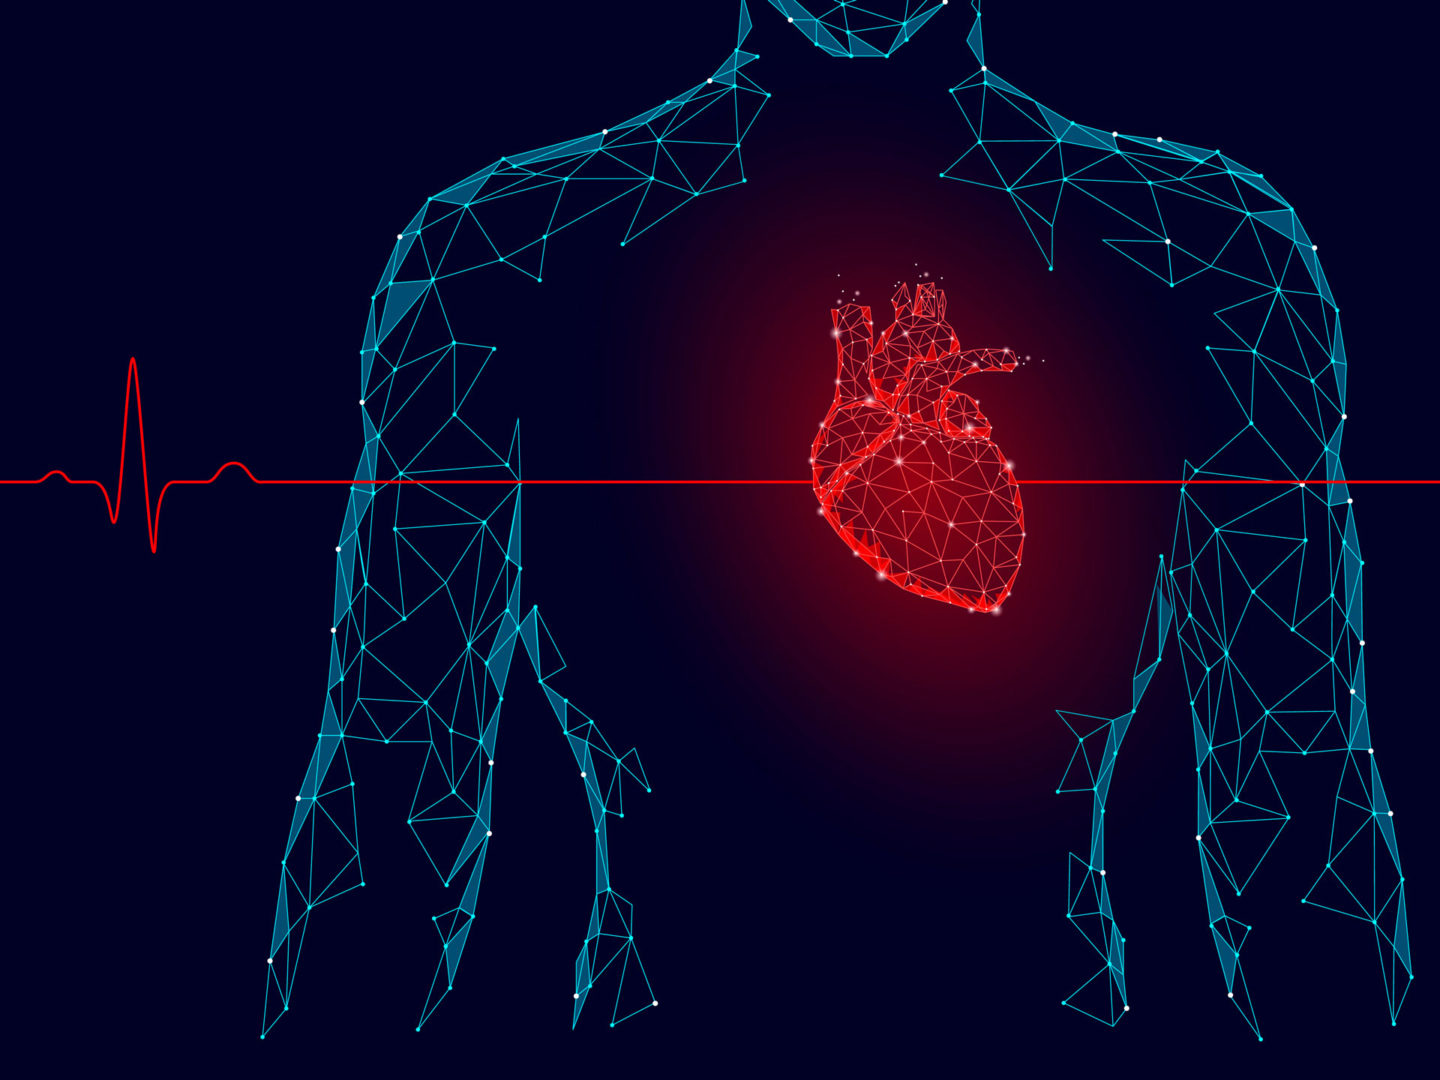

A heart attack is the death of a segment of heart muscle caused by a loss of blood supply. The blood is usually cut off when an artery supplying the heart muscle is blocked by a blood clot. If some of the heart muscle dies, a person experiences chest pain and electrical instability of the heart muscle tissue.

# This Notebook is divided in 5 sections
1. Importing the Dataset and all the necessary libraries.
2. visualization of the data
3. Preprocessing the data
4. Training of the data
5. Conclusion.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Importing the Dataset and libraries.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from random import shuffle

import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print(tf.__version__)

In [ ]:
df = pd.read_csv('/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv')

In [ ]:
df.head()

# 2. Visualizing the data

In [ ]:
df.info()

***Shuffling the data for a better training***

In [ ]:
df = np.take(df,np.random.permutation(df.shape[0]),axis=0);

In [ ]:
df.head()

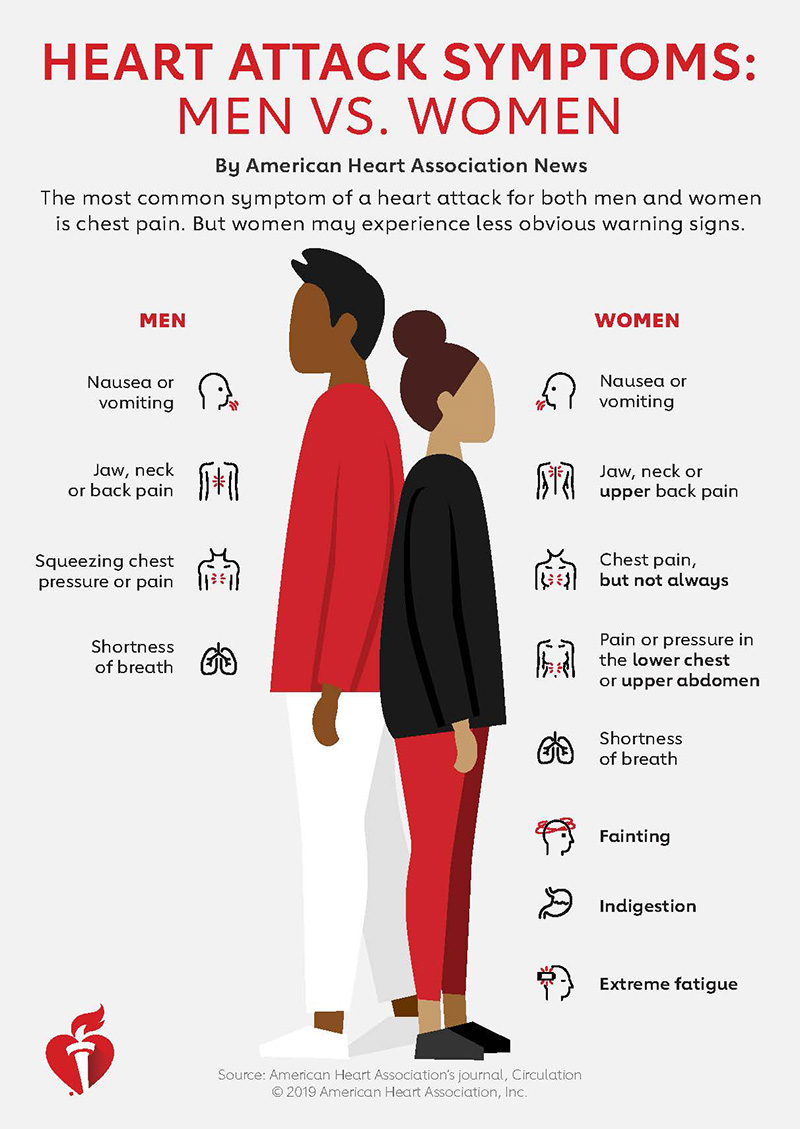

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# 3. Processing the data

In [ ]:
x = df.iloc[:,:13].values
y = df.iloc[:,13].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# 4. Training of the dataset

1. ***ANN***

In [ ]:
model = Sequential()

model.add(Dense(6))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

print('<< Compiling Model >>')

history_1 = model.fit(x_train,y_train ,batch_size = 32 ,epochs = 200)

plt.plot(history_1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

y_pred_1 = model.predict(x_test)
y_pred_1 = (y_pred_1 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_1)
print(cm)
print(accuracy_score(y_test, y_pred_1))

pred_1 = 100*accuracy_score(y_test,y_pred_1)
print('percentage Accuracy : ',pred_1)

2. ***Logistic Regression***

In [ ]:
lr = LogisticRegression()
history_2 = lr.fit(x_train,y_train) 


y_pred_2 = lr.predict(x_test)
y_pred_2 = (y_pred_2 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_2)
print(cm)
print(accuracy_score(y_test, y_pred_2))


pred_2 = 100*accuracy_score(y_test,y_pred_2)

print('percentage Accuracy : ',pred_2)

3. ***Random Forest***

In [ ]:
rnf = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=5)
history_3 = rnf.fit(x_train,y_train)


y_pred_3 = rnf.predict(x_test)
y_pred_3 = (y_pred_3 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_3)
print(cm)
print(accuracy_score(y_test, y_pred_3))

pred_3 = 100*accuracy_score(y_test,y_pred_3)

print('percentage Accuracy : ',pred_3)

4. ***Decision Tree***

In [ ]:
dt = DecisionTreeClassifier()
history_4 = dt.fit(x_train, y_train)


y_pred_4 = dt.predict(x_test)
y_pred_4 = (y_pred_4 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_4)
print(cm)
print(accuracy_score(y_test, y_pred_4))

pred_4 = 100*accuracy_score(y_test,y_pred_4)

print('percentage Accuracy : ',pred_4)

# 5. Conclusion

In [ ]:
height = [pred_1,pred_2,pred_3,pred_4]
bars = ('ANN','Logistic Reg.','Random Forest',' Decision Tree')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['green', 'blue', 'cyan','red'])
plt.xticks(y_pos, bars)
plt.show()

In [ ]:
print(max(height))

Thus, we can conclude that Random Forest has work best in this case with accuracy being ***86.84%***

Hope you enjoyed the Notebook!!!

***Thank you***